In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
df = pd.read_excel('/Users/21car/Downloads/IS4600StudentSurveySpr24.xlsx')

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Current_Class_Label'] = label_encoder.fit_transform(df['What is your current class?'])
print(df[['What is your current class?', 'Current_Class_Label']].head())

  What is your current class?  Current_Class_Label
0                      Junior                    0
1                      Senior                    1
2                      Junior                    0
3                      Senior                    1
4                      Senior                    1


C:\Users\21car\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


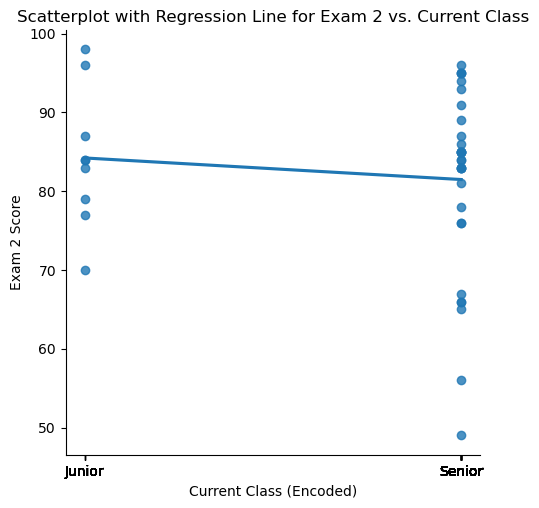

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Current_Class_Label', y='Exam2', data=df, ci=None)
plt.title('Scatterplot with Regression Line for Exam 2 vs. Current Class')
plt.xlabel('Current Class (Encoded)')
plt.ylabel('Exam 2 Score')
plt.xticks(ticks=df['Current_Class_Label'], labels=df['What is your current class?'])
plt.show()

In [77]:
import statsmodels.api as sm
y = df['Exam2']
X = sm.add_constant(df['Current_Class_Label'])
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
f_statistic = model.fvalue
print("R-squared:", r_squared)
print("F-statistic:", f_statistic)

R-squared: 0.011035215832680745
F-statistic: 0.42401732433267386


In [78]:
credit_hours_mapping = {
    'Less than 12': 0,
    '12-15': 1,
    '16-18': 2,
    'More than 18': 3
}

df['Credit_Hours_Encoded'] = df['How many credit hours are you taking this semester?'].map(credit_hours_mapping)

# Check the transformed column
print(df[['How many credit hours are you taking this semester?', 'Credit_Hours_Encoded']].head())

  How many credit hours are you taking this semester?  Credit_Hours_Encoded
0                                              12-15                      1
1                                              12-15                      1
2                                              12-15                      1
3                                              12-15                      1
4                                              12-15                      1


C:\Users\21car\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


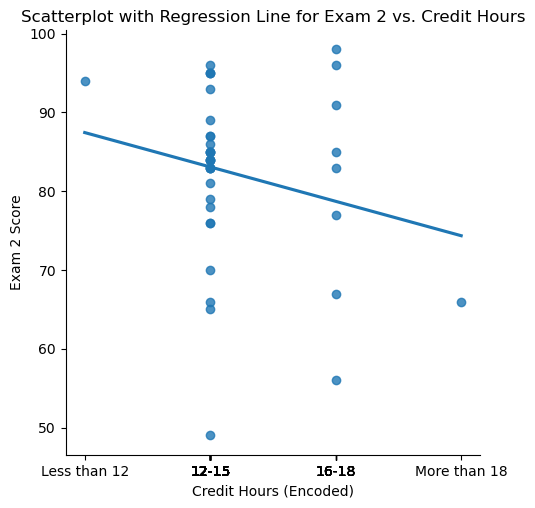

In [79]:
sns.lmplot(x='Credit_Hours_Encoded', y='Exam2', data=df, ci=None)
plt.title('Scatterplot with Regression Line for Exam 2 vs. Credit Hours')
plt.xlabel('Credit Hours (Encoded)')
plt.ylabel('Exam 2 Score')
plt.xticks(ticks=df['Credit_Hours_Encoded'], labels=df['How many credit hours are you taking this semester?'])  # Set x-axis labels
plt.show()

In [80]:
import statsmodels.api as sm
y_credit_hours = df['Exam2']
X_credit_hours = sm.add_constant(df['Credit_Hours_Encoded'])
model_credit_hours = sm.OLS(y_credit_hours, X_credit_hours).fit()
r_squared_credit_hours = model_credit_hours.rsquared
f_statistic_credit_hours = model_credit_hours.fvalue
print("R-squared (Credit Hours):", r_squared_credit_hours)
print("F-statistic (Credit Hours):", f_statistic_credit_hours)

R-squared (Credit Hours): 0.04410875575363593
F-statistic (Credit Hours): 1.7534763800035098


In [81]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Exam1', 'Exam2', 'GradeExam2',
       'How often do you use your car while on campus?',
       'How many credit hours are you taking this semester?',
       'How many specializations do you have?',
       'How many hours a day do you spend on social media?',
       'What was your ACT score?',
       'On average, how many hours a week do you study for this course (IS 4600)?',
       'How many on campus and off campus activities are you involved in on average per week? These could include jobs, clubs, sports, or other organizations.',
       'When you finish your exam, do you double-check every questions for errors before you turn it in?',
       'On average, what letter grade do you score on exams in other specialization classes?',
       'How many IS 4600 class meetings have you missed so far?',
       'What is your average quiz grade?',
       'For all classes how many hours a week do you spend studying with friends?\n',
       'When do y

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()
df['Current_Class_Label'] = label_encoder.fit_transform(df['What is your current class?'])
credit_hours_mapping = {
    'Less than 12': 0,
    '12-15': 1,
    '16-18': 2,
    'More than 18': 3
}
df['Credit_Hours_Encoded'] = df['How many credit hours are you taking this semester?'].map(credit_hours_mapping)
df['Double_Check_Encoded'] = label_encoder.fit_transform(df['When you finish your exam, do you double-check every questions for errors before you turn it in?'])
X = df[['Current_Class_Label', 'Credit_Hours_Encoded', 'Double_Check_Encoded', 'How many specializations do you have?']]
y = df['GradeExam2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

ValueError: Input y contains NaN.

In [86]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode 'What is your current class?'
df['Current_Class_Label'] = label_encoder.fit_transform(df['What is your current class?'])

# Encode 'How many credit hours are you taking this semester?'
credit_hours_mapping = {
    'Less than 12': 0,
    '12-15': 1,
    '16-18': 2,
    'More than 18': 3
}

df['Credit_Hours_Encoded'] = df['How many credit hours are you taking this semester?'].map(credit_hours_mapping)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the column 'When you finish your exam, do you double-check every question for errors before you turn it in?'
df['Double_Check_Encoded'] = label_encoder.fit_transform(df['When you finish your exam, do you double-check every question for errors before you turn it in?'])

# Check the transformed column
print(df[['When you finish your exam, do you double-check every questions for errors before you turn it in?', 'Double_Check_Encoded']].head())
# Select independent variables (features)
X = df[['Current_Class_Label', 'Credit_Hours_Encoded', 'Double_Check_Encoded', 'How many specializations do you have?']]

# Define dependent variable
y = df['Exam2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classification model (Logistic Regression)
model = LogisticRegression(max_iter=1000, zero_division=1)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

KeyError: 'When you finish your exam, do you double-check every question for errors before you turn it in?'

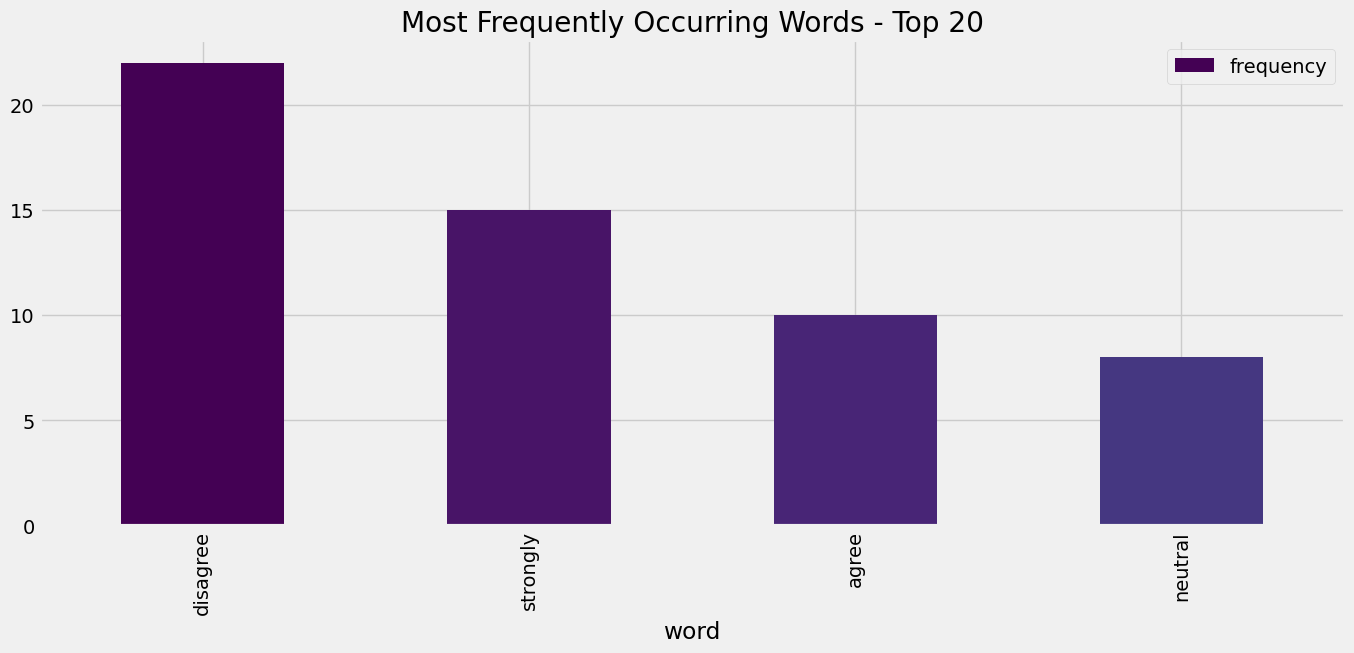

In [91]:
cv = CountVectorizer(stop_words='english')

# Fit and transform the 'Taylor Swift is the music industry' column
words = cv.fit_transform(df['Taylor Swift is the music industry.'])

# Sum the occurrences of each word
sum_words = words.sum(axis=0)

# Create a list of tuples containing the word and its frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# Sort the list by frequency in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert the list to a DataFrame
frequency = pd.DataFrame(words_freq, columns=['word', 'frequency'])

# Plot the top 20 most frequently occurring words
plt.style.use('fivethirtyeight')
color = plt.cm.viridis(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='frequency', kind='bar', figsize=(15, 6), color=color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()

In [ ]:
pip install wordcloud

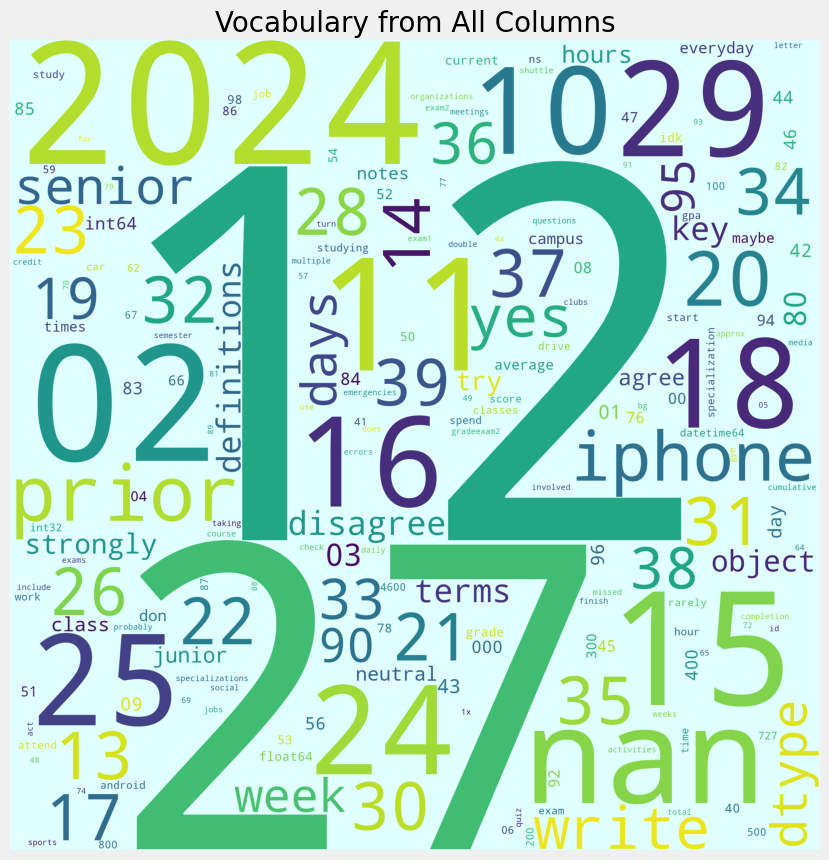

In [98]:
from wordcloud import WordCloud

# Convert each column to a string and join them
all_text = ' '.join(str(df[col]) for col in df.columns)

# Generate word frequencies using CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform([all_text])
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# Generate word cloud from frequencies
wordcloud = WordCloud(background_color='lightcyan', width=2000, height=2000).generate_from_frequencies(dict(words_freq))

# Display the word cloud
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from All Columns", fontsize=20)
plt.show()

In [100]:
print('I got the first one from the Taylor Swift Column. It seems most people disagree that she is part of the music industry. It would also appear people have very strong opinions about her')

I got the first one from the Taylor Swift Column. It seems most people disagree that she is part of the music industry. It would also appear people have very strong opinions about her


In [101]:
print('I got this by printing all the words in the excel. The size is based on how frequently they appear. IT seems the numbers 27 and 12 show up alot')

I got this by printing all the words in the excel. The size is based on how frequently they appear. IT seems the numbers 27 and 12 show up alot
